In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

from interpret import show
from interpret.glassbox import ExplainableBoostingClassifier

# from interpret import set_visualize_provider
# from interpret.provider import InlineProvider
# set_visualize_provider(InlineProvider())

In [2]:
# import data
df = pd.read_csv("./data/CEE_DATA.csv", quotechar="'")

X = df[
    [
        "Gender",
        "Caste",
        "coaching",
        "time",
        "Class_ten_education",
        "twelve_education",
        "medium",
        "Class_X_Percentage",
        "Class_XII_Percentage",
        "Father_occupation",
        "Mother_occupation",
    ]
]
Y = df["Performance"]

In [3]:
# split data
seed = 1
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=seed
)
print("Train Size Instances: ", X_train.shape[0])
print("Test Size Instances:", X_test.shape[0])

Train Size Instances:  466
Test Size Instances: 200


In [4]:
ohe = OneHotEncoder(sparse=False)
Xoded = pd.DataFrame(ohe.fit_transform(X),columns=ohe.get_feature_names(['Gender', 'Caste', 'coaching', 'time', 'Class_ten_education',
       'twelve_education', 'medium', 'Class_X_Percentage',
       'Class_XII_Percentage', 'Father_occupation', 'Mother_occupation']))
X_train_enc, X_test_enc, Y_train_enc, Y_test_enc = train_test_split(
    Xoded, Y, test_size=0.3, random_state=seed
)
print("Train Size Instances: ", X_train_enc.shape[0])
print("Test Size Instances:", X_test_enc.shape[0])

Train Size Instances:  466
Test Size Instances: 200


## EBM

In [5]:
# https://interpret.ml/docs/ebm.html?highlight=multiclass#

ebm = ExplainableBoostingClassifier(random_state=seed)
ebm.fit(X_train, Y_train)

# global explanations
ebm_global = ebm.explain_global()
show(ebm_global)

C:\Anaconda\anaconda3\envs\RnD\lib\site-packages\interpret\glassbox\ebm\ebm.py:922: UserWarning: Multiclass is still experimental. Subject to change per release.
  warn("Multiclass is still experimental. Subject to change per release.")
C:\Anaconda\anaconda3\envs\RnD\lib\site-packages\interpret\glassbox\ebm\ebm.py:925: UserWarning: Detected multiclass problem: forcing interactions to 0
  warn("Detected multiclass problem: forcing interactions to 0")
C:\Anaconda\anaconda3\envs\RnD\lib\site-packages\interpret\visual\udash.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
C:\Anaconda\anaconda3\envs\RnD\lib\site-packages\interpret\visual\udash.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Anaconda\anaconda3\envs\Rn

<!-- http://127.0.0.1:7001/2784388874000/ -->

In [6]:
ebm_global.data(-1)

{'overall': {'type': 'univariate',
  'names': ['Gender',
   'Caste',
   'coaching',
   'time',
   'Class_ten_education',
   'twelve_education',
   'medium',
   'Class_X_Percentage',
   'Class_XII_Percentage',
   'Father_occupation',
   'Mother_occupation'],
  'scores': [0.04646169877946545,
   0.7570752840339648,
   0.1302763748957357,
   0.14802091237685572,
   0.12133939822327415,
   0.1173290460826962,
   0.13723345201926537,
   0.11642691564352671,
   0.20385361664274151,
   0.11704536224347514,
   0.08136793428855146]},
 'specific': [{'type': 'univariate',
   'names': ['female', 'male'],
   'scores': array([[ 0.07586847, -0.08201851, -0.02397834,  0.0167691 ],
          [-0.06669083,  0.07209691,  0.02107774, -0.01474058]]),
   'scores_range': (-2.5931982149691297, 3.205159687899679),
   'upper_bounds': array([[ 0.11362153, -0.0595978 ,  0.01190111,  0.03910761],
          [-0.02685585,  0.08815176,  0.05128844,  0.00420558]]),
   'lower_bounds': array([[ 0.03811541, -0.10443921, 

In [7]:
ebm.get_params()

{'binning': 'quantile',
 'early_stopping_rounds': 50,
 'early_stopping_tolerance': 0.0001,
 'feature_names': ['Gender',
  'Caste',
  'coaching',
  'time',
  'Class_ten_education',
  'twelve_education',
  'medium',
  'Class_X_Percentage',
  'Class_XII_Percentage',
  'Father_occupation',
  'Mother_occupation'],
 'feature_types': ['categorical',
  'categorical',
  'categorical',
  'categorical',
  'categorical',
  'categorical',
  'categorical',
  'categorical',
  'categorical',
  'categorical',
  'categorical'],
 'inner_bags': 0,
 'interactions': 0,
 'learning_rate': 0.01,
 'mains': 'all',
 'max_bins': 256,
 'max_interaction_bins': 32,
 'max_leaves': 3,
 'max_rounds': 5000,
 'min_samples_leaf': 2,
 'n_jobs': -2,
 'outer_bags': 8,
 'random_state': 1,
 'validation_size': 0.15}

In [8]:
# local explanations
ebm_local = ebm.explain_local(X_test[:5], Y_train[:5])
show(ebm_local)

<!-- http://127.0.0.1:7001/2784401407664/ -->

In [9]:
def show_metrics(model, X_test, Y_test):
    Y_pred = model.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))
    print("Precision: ", metrics.precision_score(Y_test, Y_pred, average="micro"))
    print("Recall: ", metrics.recall_score(Y_test, Y_pred, average="micro"))
    print("F1 score: ", metrics.f1_score(Y_test, Y_pred, average="micro"))
    cm = metrics.confusion_matrix(Y_test, Y_pred, labels=model.classes_)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

Accuracy:  0.475
Precision:  0.475
Recall:  0.475
F1 score:  0.47500000000000003


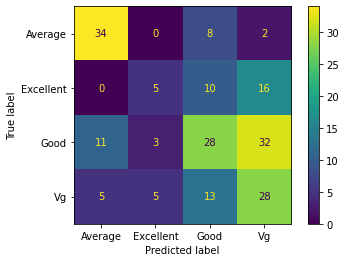

In [10]:
show_metrics(ebm, X_test, Y_test)

## Linear Model

In [11]:
# https://interpret.ml/docs/lr.html

from interpret.glassbox import LogisticRegression

lr = LogisticRegression(random_state=seed)
lr.fit(X_train_enc, Y_train_enc)

lr_global = lr.explain_global()
show(lr_global)

C:\Anaconda\anaconda3\envs\RnD\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



<!-- http://127.0.0.1:7001/2784410487008/ -->

In [12]:
# seems this one doesn't support strings for y labels
# lr_local = lr.explain_local(X_test_enc[:5], Y_test_enc[:5])
# show(lr_local)

## Decision tree

In [13]:
from interpret.glassbox import ClassificationTree

dt = ClassificationTree(random_state=seed)
dt.fit(X_train_enc, Y_train_enc)

dt_global = dt.explain_global()
show(dt_global)

<!-- http://127.0.0.1:7001/2784326678800/ -->

In [14]:
# seems this one doesn't support strings for y labels
# dt_local = dt.explain_local(X_test_enc[:5], Y_test_enc[:5])
# show(dt_local)

## Descision Rule

In [15]:
from interpret.glassbox import DecisionListClassifier

dl = DecisionListClassifier(random_state=seed)
dl.fit(X_train_enc, Y_train_enc)

dl_global = dl.explain_global()
show(dl_global)

C:\Anaconda\anaconda3\envs\RnD\lib\site-packages\skrules\skope_rules.py:214: UserWarning:

Found labels {0, 1, 2, 3}. This method assumes target class to be labeled as 1 and normal data to be labeled as 0. Any label different from 0 will be considered as being from the target class.



<!-- http://127.0.0.1:7001/2784327711952/ -->

In [16]:
# seems this one doesn't support strings for y labels
# dl_local = dl.explain_local(X_test_enc[:5], Y_test_enc[:5])
# show(dl_local)